In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from astropy.io import fits
import seaborn as sns

In [2]:
#Reading the Velocity FITS file
virgo=fits.open("C:/Users/SSA/Desktop/Jesto Research/VIRGO SOHO/virgo_blue_intensity_series.fits")
virgo.info()

Filename: C:/Users/SSA/Desktop/Jesto Research/VIRGO SOHO/virgo_blue_intensity_series.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (9450720,)   float32   


In [3]:
virgo[0].header 

SIMPLE  =                    T / Written by IDL:  Wed Jun  3 12:29:02 2015      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =              9450720 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2015-05-20'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
DATA    = 'SOHO/VIRGO SPM-blue intensity series' /Solar oscillations            
JDSTART =        2450184.49936 /Starting date (julian day)                      
JDEND   =        2456747.49887 /Ending date (julian day)                        
INSTRUME= 'VIRGO/SPM blue'     /Instrument                                      
FILENAME= 'SPM_blue_intensit

In [4]:
#Data collected from April 11 1996 to March 31 2014

In [5]:
#First 1000 velocity values
d=pd.DataFrame(virgo[0].data).head(1000).rename(columns={0:"Blue Ray"})
d

,Blue Ray
0,-131.818466
1,-86.511978
2,-23.141470
3,-18.064020
4,-64.444626
...,...
995,64.759804
996,83.708359
997,52.888489
998,35.461937


C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Blue Ray'>

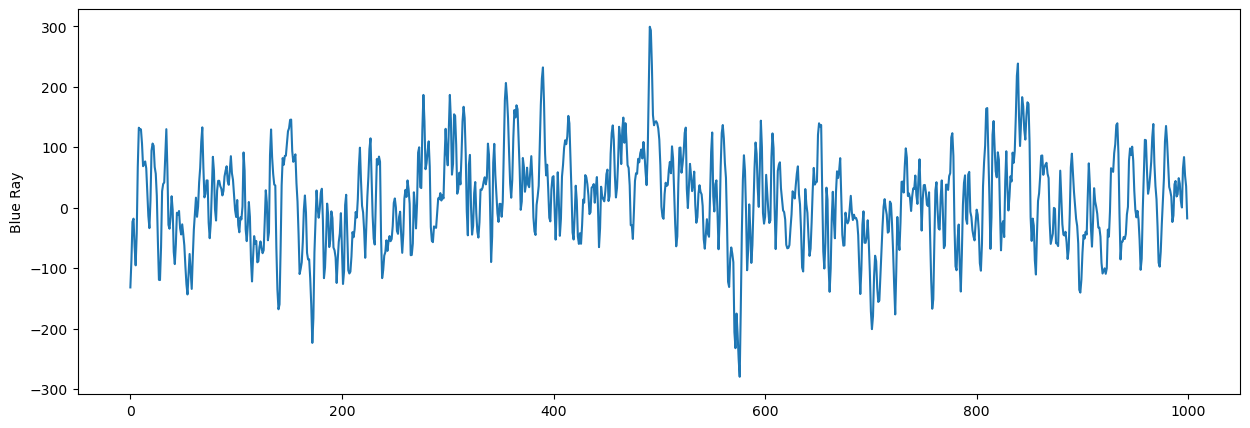

In [6]:
#Plotting the VIRGO velocity for 1000 minutes (Original Data)
plt.rcParams['figure.figsize'] = [15,5]
sns.lineplot(range(0,1000),d["Blue Ray"])

In [7]:
#Converting minutes to days
e=pd.DataFrame(virgo[0].data)
e=abs(e)

virgo_daily=e.groupby(np.arange(len(e))//1440).mean().rename(columns={0:"Blue Ray"})

#Setting Date column
virgo_daily["Date"]=pd.DataFrame(pd.date_range(start='1996-04-11', end='2014-03-31'))[0]

virgo_daily['Day'] = pd.DatetimeIndex(virgo_daily['Date']).day
virgo_daily['Month'] = pd.DatetimeIndex(virgo_daily['Date']).month
virgo_daily['Year'] = pd.DatetimeIndex(virgo_daily['Date']).year

virgo_daily

,Blue Ray,Date,Day,Month,Year
0,60.535271,1996-04-11,11,4,1996
1,60.269039,1996-04-12,12,4,1996
2,59.186905,1996-04-13,13,4,1996
3,62.658813,1996-04-14,14,4,1996
4,61.473248,1996-04-15,15,4,1996
...,...,...,...,...,...
6558,66.232391,2014-03-26,26,3,2014
6559,70.386726,2014-03-27,27,3,2014
6560,66.531616,2014-03-28,28,3,2014
6561,68.798706,2014-03-29,29,3,2014


## VIRGO DAILY OSCILLATIONS

C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Blue Ray'>

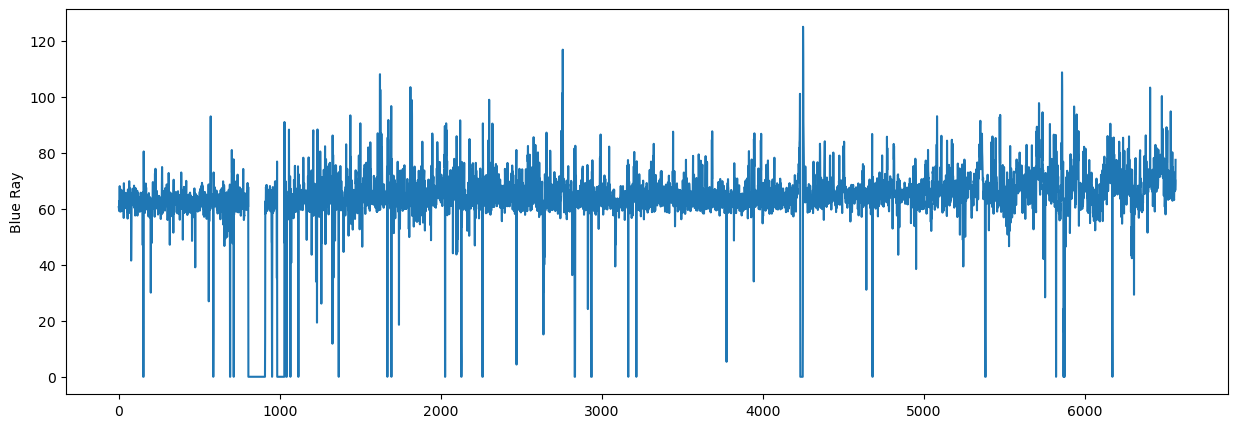

In [16]:
#Plotting the VIRGO DAILY OSCILLATIONS
plt.rcParams['figure.figsize'] = [15,5]
sns.lineplot(range(0,6563),virgo_daily["Blue Ray"])
sns.scatterplot(x=[2045],y=[virgo_daily.iloc[2045]["Blue Ray"]],color='red')
#plt.xlim(2000,2100)

## VIRGO MONTHLY DATA

In [9]:
#Converting to monthly data

virgo_month=pd.DataFrame(virgo_daily.groupby(["Year","Month"])["Blue Ray"].mean())
virgo_month

virgo_month.to_csv("virgo_month.csv")
virgo_month=pd.read_csv("virgo_month.csv")

virgo_month["year_month"]=virgo_month["Year"].astype(str) +"-"+virgo_month["Month"].astype(str)
virgo_month

,Year,Month,Blue Ray,year_month
0,1996,4,62.334206,1996-4
1,1996,5,62.875305,1996-5
2,1996,6,61.143467,1996-6
3,1996,7,63.375675,1996-7
4,1996,8,62.449177,1996-8
...,...,...,...,...
211,2013,11,70.562195,2013-11
212,2013,12,74.073616,2013-12
213,2014,1,72.072620,2014-1
214,2014,2,72.519936,2014-2


(0.0, 150.0)

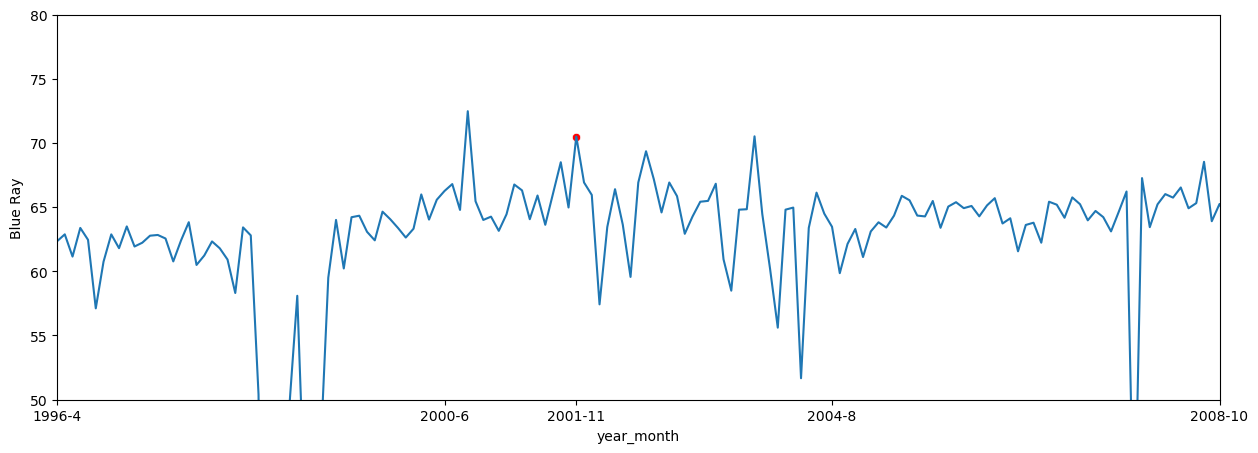

In [10]:
#Plotting the VIRGO MONTHLY OSCILLATIONS
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15,5]
ax=sns.lineplot(x=virgo_month["year_month"],y=virgo_month["Blue Ray"]).set(xticks=[0,50,67,100,150,200,215])

#solar maximum for cycle 23 was on 2001-11
sns.scatterplot(x=[virgo_month.iloc[67]["year_month"]],y=virgo_month.iloc[67]["Blue Ray"],color='red')
plt.ylim(50,80)
plt.xlim(0,150) #setting the graph for 23rd cycle (till 2008)


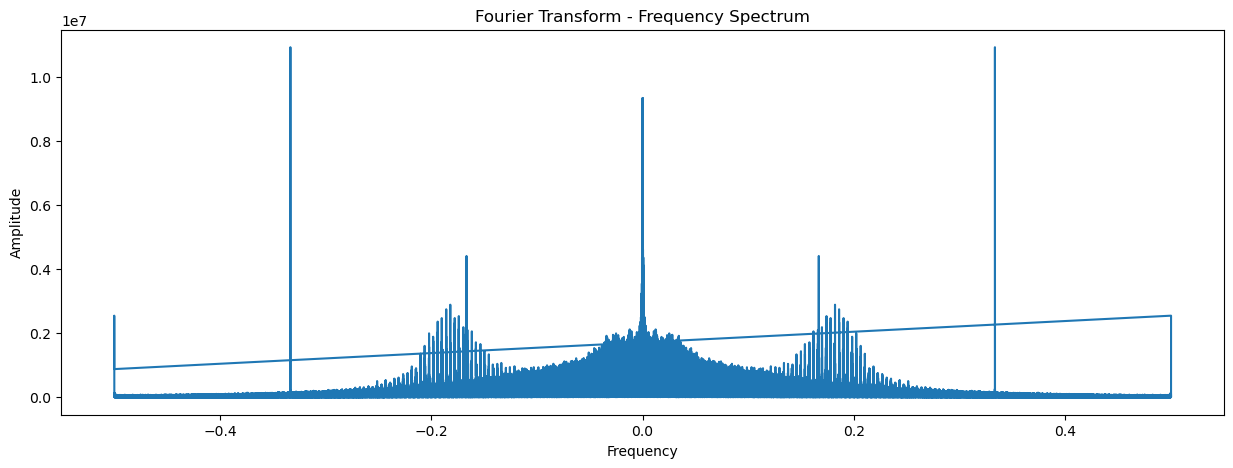

In [11]:
#Fourier Transformation

data=pd.DataFrame(virgo[0].data).rename(columns={0:"Blue Ray"})
data

# Apply Fourier series transformation
fourier_transform = np.fft.fft(data["Blue Ray"])

# Calculate the magnitudes of the frequency components
amplitudes = np.abs(fourier_transform)

# Calculate the corresponding frequencies
sampling_rate = 1  # Assuming the data has a sampling rate of 1 (you may need to adjust this accordingly)
frequencies = np.fft.fftfreq(len(data), d=1/sampling_rate)

# Plot the frequency spectrum
plt.plot(frequencies, amplitudes)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Frequency Spectrum')
plt.show()


## YEARLY DATA

In [12]:
virgo_year=pd.DataFrame(virgo_month.groupby("Year")["Blue Ray"].mean())

virgo_year.to_csv("virgo_year.csv")
virgo_year=pd.read_csv("virgo_year.csv")
virgo_year[:13]

,Year,Blue Ray
0,1996,61.633621
1,1997,62.235239
2,1998,42.184221
3,1999,56.316420
4,2000,65.460622
5,2001,65.930302
6,2002,64.765695
7,2003,64.094428
8,2004,61.738622
9,2005,64.496418


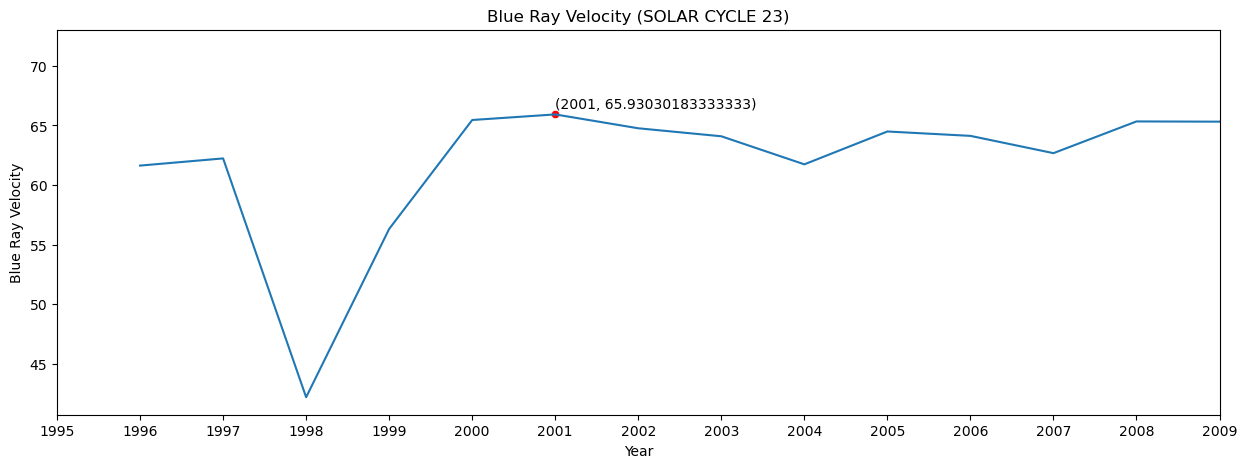

In [13]:
#Plotting the VIRGO YEARLY OSCILLATIONS
from matplotlib import pyplot as plt

#plt.rcParams['figure.figsize'] = [15,5]
sns.lineplot(x=virgo_year["Year"],y=virgo_year["Blue Ray"]).set(xticks=range(1995,2015))

#solar maximum for cycle 23 was on 2001-11
sns.scatterplot(x=[2001],y=virgo_year.iloc[5]["Blue Ray"],color='red')
plt.xlim(1995,2009)
plt.ylabel("Blue Ray Velocity")
plt.title("Blue Ray Velocity (SOLAR CYCLE 23)")

for i, j in zip([2001], [virgo_year.iloc[5]["Blue Ray"]]):
   plt.text(i, j+0.5, '({}, {})'.format(i, j))

C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Blue Ray'>

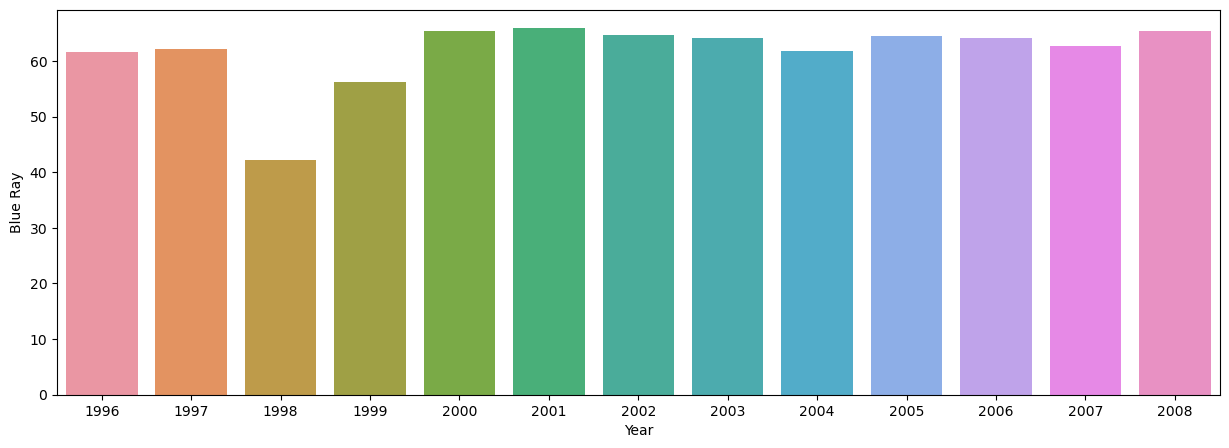

In [14]:
#We get the max oscillation mag in 2001, that is the solar max year of 23rd Cycle
sns.barplot(virgo_year["Year"].iloc[:13],virgo_year["Blue Ray"].iloc[:13])